In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('/content/Training Data.csv')

In [7]:
df.sample()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
18893,18894,3290138,36,13,single,rented,no,Dentist,Jehanabad[38],Bihar,8,12,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


**DESCRIPTIVE STATISTICS**

In [9]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [11]:
df.describe().transpose()[['mean','50%']]

,mean,50%
Id,1.260005e+05,126000.5
Income,4.997117e+06,5000694.5
Age,4.995407e+01,50.0
Experience,1.008444e+01,10.0
CURRENT_JOB_YRS,6.333877e+00,6.0
CURRENT_HOUSE_YRS,1.199779e+01,12.0
Risk_Flag,1.230000e-01,0.0


In [ ]:
#tidak ada missing values karena dari rata rata dengan median nilainya tidak jauh

In [12]:
df.select_dtypes('object').describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


(array([22618., 11087., 57799., 25091., 23491., 38799., 17132., 29363.,
        10605., 16015.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

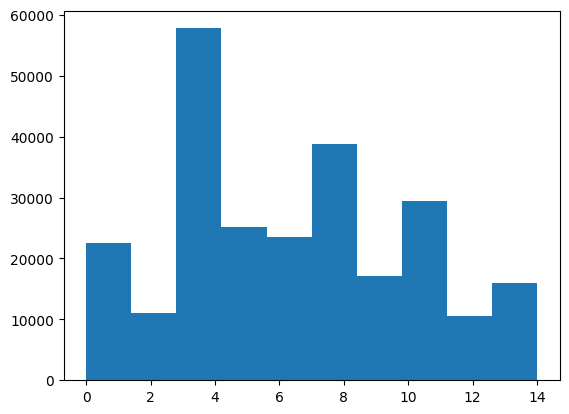

In [15]:
plt.hist(df['CURRENT_JOB_YRS'])

In [23]:
current_job_yrs = df['CURRENT_JOB_YRS']

print('Mean:',current_job_yrs.mean())
print('Median:',current_job_yrs.median())
print('Mode:',current_job_yrs.mode()[0])

#quartile
print('Q1:',current_job_yrs.quantile(0.25))
print('Q3:',current_job_yrs.quantile(0.75))

#percentile
print('P95:',current_job_yrs.quantile(0.95))
print('P99:',current_job_yrs.quantile(0.99))

Mean: 6.333876984126984
Median: 6.0
Mode: 3
Q1: 3.0
Q3: 9.0
P95: 13.0
P99: 14.0


In [24]:
print('Standard Deviation:',current_job_yrs.std())
print('Variance:',current_job_yrs.var())

Standard Deviation: 3.647053003160982
Variance: 13.300995607865538


In [26]:
#InterQuartileRange
Q1 = current_job_yrs.quantile(0.25)
Q3 = current_job_yrs.quantile(0.75)
print('Interquartile Range;', Q3-Q1)

Interquartile Range; 6.0


In [25]:
#range
min_value = current_job_yrs.min()
max_value = current_job_yrs.max()
print('Range:',max_value-min_value)

Range: 14


Menjawab pertanyaan #1.
a. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
= semua kolom sudah sesuai
b. apakah ada kolom yang memiliki nilai kosong? jika ada, apa saja?
= dari df.info() diketahui bahwa tidak ada nilai kosong, semua kolom berjumlah sama
c. apakah ada nilai summary agak aneh?
= perbedaan jumlah rata-rata dengan median tidak ada perbedaan yang sangat jauh, antara nilai min dan max pun normal.